<a href="https://colab.research.google.com/github/GustaGomesUni/progweb/blob/main/AtividadeProcDigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicação de Processamento Digital com Python**

Este notebook implementa uma aplicação de processamento digital com funcionalidades de esteganografia, encriptação e geração de hash, conforme solicitado.

## **1. Instalação de Dependências**

Instala as bibliotecas necessárias para manipulação de imagens e criptografia.

```python
!pip install pillow cryptography


## **2. Configuração de Chaves para Criptografia**

Esta seção cria e armazena as chaves pública e privada, necessárias para a criptografia e decriptação das mensagens.

```python
# código referente à geração de chaves pública e privada
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes

def gerar_chaves():
    chave_privada = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
    )
    chave_publica = chave_privada.public_key()
    return chave_privada, chave_publica

chave_privada, chave_publica = gerar_chaves()


## **3. Funções da Aplicação**

### **3.1 Função de Esteganografia - Embutir Texto**

Implementação da técnica de esteganografia para embutir texto em uma imagem.

```pytho
def embutir_texto(imagem_caminho, texto):
    imagem = Image.open(imagem_caminho)
    imagem = imagem.convert("RGB")
    largura, altura = imagem.size
    texto += chr(0)  # caractere nulo para indicar o fim do texto
    
    idx = 0
    for y in range(altura):
        for x in range(largura):
            if idx < len(texto):
                r, g, b = imagem.getpixel((x, y))
                novo_r = r & 0xFE | (ord(texto[idx]) & 1)
                imagem.putpixel((x, y), (novo_r, g, b))
                idx += 1
            else:
                imagem.save("imagem_com_texto.png")
                return "imagem_com_texto.png"

```

### 3.2 Função de Esteganografia - Recuperar Texto

Recupera o texto embutido previamente em uma imagem, decodificando a informação escondida.

```python
def recuperar_texto(imagem_caminho):
    imagem = Image.open(imagem_caminho)
    largura, altura = imagem.size
    texto = ""
    
    for y in range(altura):
        for x in range(largura):
            r, g, b = imagem.getpixel((x, y))
            texto += chr(r & 1)
            if texto.endswith(chr(0)):
                return texto[:-1]

```

### 3.3 Função de Geração de Hash

Gera o hash de uma imagem, tanto original quanto alterada, para verificar se houve alguma modificação.

```python
def gerar_hash(imagem_caminho):
    with open(imagem_caminho, "rb") as f:
        dados = f.read()
        hash_obj = hashlib.sha256(dados)
    return hash_obj.hexdigest()
```

### 3.4 Função de Encriptação de Mensagem

Encripta uma mensagem de texto usando criptografia de chave pública.

```python
def encriptar_mensagem(mensagem):
    mensagem_bytes = mensagem.encode()
    mensagem_encriptada = chave_publica.encrypt(
        mensagem_bytes,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensagem_encriptada
```

### 3.5 Função de Decriptação de Mensagem

Desencripta a mensagem previamente encriptada, utilizando a chave privada para recuperar o texto original.

```python
def decriptar_mensagem(mensagem_encriptada):
    mensagem_decriptada = chave_privada.decrypt(
        mensagem_encriptada,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensagem_decriptada.decode()
```

# **Codigo completo referente a atividade.**

Codigo inteiro e funcional, contém o menu interativo também.

In [ ]:
# Instale as bibliotecas necessárias
!pip install pillow cryptography

from PIL import Image
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes, serialization
import hashlib

# Geração das chaves pública e privada para encriptação
def gerar_chaves():
    chave_privada = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
    )
    chave_publica = chave_privada.public_key()
    return chave_privada, chave_publica

chave_privada, chave_publica = gerar_chaves()

# Função para embutir texto em uma imagem usando esteganografia
def embutir_texto(imagem_caminho, texto):
    imagem = Image.open(imagem_caminho)
    imagem = imagem.convert("RGB")
    largura, altura = imagem.size
    texto_binario = ''.join(format(ord(i), '08b') for i in texto) + '00000000'  # Caractere nulo como fim do texto

    idx = 0
    for y in range(altura):
        for x in range(largura):
            if idx < len(texto_binario):
                r, g, b = imagem.getpixel((x, y))
                novo_r = (r & 0xFE) | int(texto_binario[idx])  # Inserir bit do texto no LSB
                imagem.putpixel((x, y), (novo_r, g, b))
                idx += 1
            else:
                imagem.save("imagem_com_texto.png", format="PNG")
                return "imagem_com_texto.png"

# Função para recuperar texto embutido de uma imagem
def recuperar_texto(imagem_caminho):
    imagem = Image.open(imagem_caminho)
    largura, altura = imagem.size
    texto_binario = ""

    for y in range(altura):
        for x in range(largura):
            r, g, b = imagem.getpixel((x, y))
            texto_binario += str(r & 1)  # Extrair o bit menos significativo
            if texto_binario.endswith("00000000"):
                texto = ''.join(chr(int(texto_binario[i:i+8], 2)) for i in range(0, len(texto_binario)-8, 8))
                return texto

# Função para gerar hash de uma imagem
def gerar_hash(imagem_caminho):
    with open(imagem_caminho, "rb") as f:
        dados = f.read()
        hash_obj = hashlib.sha256(dados)
    return hash_obj.hexdigest()

# Função para encriptar uma mensagem com chave pública
def encriptar_mensagem(mensagem):
    mensagem_bytes = mensagem.encode()
    mensagem_encriptada = chave_publica.encrypt(
        mensagem_bytes,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensagem_encriptada

# Função para decriptar uma mensagem com chave privada
def decriptar_mensagem(mensagem_encriptada):
    mensagem_encriptada = bytes.fromhex(mensagem_encriptada)  # Converter de hexadecimal para bytes
    mensagem_decriptada = chave_privada.decrypt(
        mensagem_encriptada,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return mensagem_decriptada.decode()

# Menu interativo
def menu():
    while True:
        print("\nMenu de opções:")
        print("(1) Embutir texto em uma imagem usando Steganography")
        print("(2) Recuperar texto de uma imagem alterada por Steganography")
        print("(3) Gerar hash das imagens")
        print("(4) Encriptar mensagem com chave pública")
        print("(5) Decriptar mensagem com chave privada")
        print("(S ou s) Sair")

        opcao = input("Escolha uma opção: ")
        if opcao == "1":
            imagem_caminho = input("Caminho da imagem: ")
            texto = input("Texto para embutir: ")
            imagem_com_texto = embutir_texto(imagem_caminho, texto)
            print(f"Texto embutido e imagem salva em {imagem_com_texto}")

        elif opcao == "2":
            imagem_caminho = input("Caminho da imagem: ")
            texto_recuperado = recuperar_texto(imagem_caminho)
            print("Texto recuperado:", texto_recuperado)

        elif opcao == "3":
            imagem_caminho = input("Caminho da imagem: ")
            hash_imagem = gerar_hash(imagem_caminho)
            print("Hash da imagem:", hash_imagem)

        elif opcao == "4":
            mensagem = input("Mensagem para encriptar: ")
            mensagem_encriptada = encriptar_mensagem(mensagem)
            print("Mensagem encriptada (hexadecimal):", mensagem_encriptada.hex())

        elif opcao == "5":
            mensagem_encriptada = input("Mensagem encriptada (hexadecimal): ")
            mensagem_decriptada = decriptar_mensagem(mensagem_encriptada)
            print("Mensagem decriptada:", mensagem_decriptada)

        elif opcao.lower() == "s":
            print("Saindo...")
            break
        else:
            print("Opção inválida, tente novamente.")

# Executar o menu
menu()



Menu de opções:
(1) Embutir texto em uma imagem usando Steganography
(2) Recuperar texto de uma imagem alterada por Steganography
(3) Gerar hash das imagens
(4) Encriptar mensagem com chave pública
(5) Decriptar mensagem com chave privada
(S ou s) Sair
Escolha uma opção: 3
Caminho da imagem: /content/imagem_com_texto.png
Hash da imagem: 147e1346603aae46e0ef1f2021835b50ad68fe4c245a61a45c7868d654be98a6

Menu de opções:
(1) Embutir texto em uma imagem usando Steganography
(2) Recuperar texto de uma imagem alterada por Steganography
(3) Gerar hash das imagens
(4) Encriptar mensagem com chave pública
(5) Decriptar mensagem com chave privada
(S ou s) Sair
Escolha uma opção: 4
Mensagem para encriptar: teste
Mensagem encriptada (hexadecimal): a3b2bd4cda807cfe2822ebf006dc020e2c850a2956cbc43e8cbb2bd5d4a75f181f80a330b45247b91dff4ac80d9d41c8f9b692fd9a98e6a9077973c7ba8fe8e54164cd08cc930e93b3d912c8f26e527206b73d76a50c2e7d73cd01127537f537dd2116c7d9a9336c4aee31dd93e969dbe252ca2736239cb2ff2347fab24138

# Testes das Funcionalidades

### 5.1 Teste da Esteganografia (Inserção e Recuperação de Texto)
---
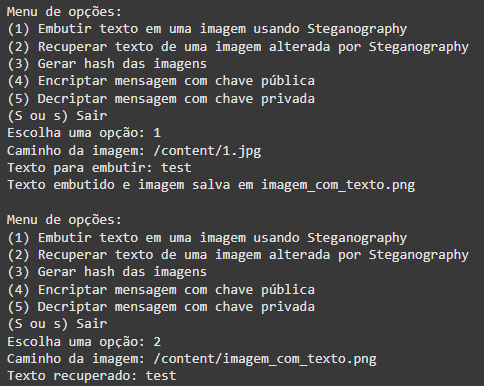

---

### 5.2 Teste de Geração de Hash

---

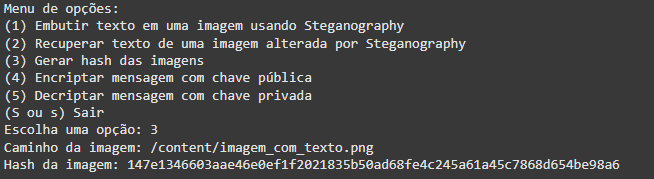

---

### Teste de Encriptação e Decriptação

Teste de encriptação
```
Menu de opções:
(1) Embutir texto em uma imagem usando Steganography
(2) Recuperar texto de uma imagem alterada por Steganography
(3) Gerar hash das imagens
(4) Encriptar mensagem com chave pública
(5) Decriptar mensagem com chave privada
(S ou s) Sair
Escolha uma opção: 4
Mensagem para encriptar: teste
Mensagem encriptada (hexadecimal): a3b2bd4cda807cfe2822ebf006dc020e2c850a2956cbc43e8cbb2bd5d4a75f181f80a330b45247b91dff4ac80d9d41c8f9b692fd9a98e6a9077973c7ba8fe8e54164cd08cc930e93b3d912c8f26e527206b73d76a50c2e7d73cd01127537f537dd2116c7d9a9336c4aee31dd93e969dbe252ca2736239cb2ff2347fab2413808badf3429b43673001bd8dcfcf8bda4d3b3feda43ac2a07e27f5e504e7bf292a23d2ad538134c6d5e09cf6d30ac81c47ad06efe1777a0d5f61a4043658c990fcced33ffc298a0dbfd8017940d4baf12aea27355c5b2a8f75b64463fde64069ffb0a1ddda186d298a12f8291c1e609b052be4b5f9756409cc6808ae88afa8d5355

```
Teste de decriptação

```
Menu de opções:
(1) Embutir texto em uma imagem usando Steganography
(2) Recuperar texto de uma imagem alterada por Steganography
(3) Gerar hash das imagens
(4) Encriptar mensagem com chave pública
(5) Decriptar mensagem com chave privada
(S ou s) Sair
Escolha uma opção: 5
Mensagem encriptada (hexadecimal): a3b2bd4cda807cfe2822ebf006dc020e2c850a2956cbc43e8cbb2bd5d4a75f181f80a330b45247b91dff4ac80d9d41c8f9b692fd9a98e6a9077973c7ba8fe8e54164cd08cc930e93b3d912c8f26e527206b73d76a50c2e7d73cd01127537f537dd2116c7d9a9336c4aee31dd93e969dbe252ca2736239cb2ff2347fab2413808badf3429b43673001bd8dcfcf8bda4d3b3feda43ac2a07e27f5e504e7bf292a23d2ad538134c6d5e09cf6d30ac81c47ad06efe1777a0d5f61a4043658c990fcced33ffc298a0dbfd8017940d4baf12aea27355c5b2a8f75b64463fde64069ffb0a1ddda186d298a12f8291c1e609b052be4b5f9756409cc6808ae88afa8d5355
Mensagem decriptada: teste
```

